### Training procedure

In [8]:
import torch
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


### Prepare dataset

Training set has 60000 instances
Validation set has 10000 instances
Sneaker  Sandal  T-shirt/top  Bag


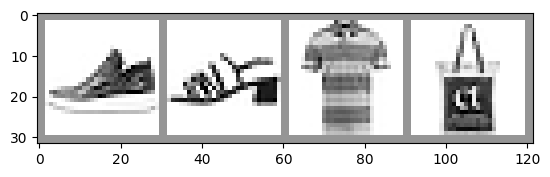

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

#Visualize the datset
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

images, labels = next(iter(training_loader))

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

### Prepare the model

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    


In [36]:
model = GarmentClassifier()
for X,y in training_loader:
    print(X.shape)
    print(y.shape)
    pred = model(X)
    print(pred.shape)

    break

torch.Size([4, 1, 28, 28])
torch.Size([4])
torch.Size([4, 10])


### Trainining procedure

In [42]:
#multiclass task 
loss_fn = torch.nn.CrossEntropyLoss()

loss = loss_fn(pred, y)
print(loss.item())

model = GarmentClassifier()

opt = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

def train_epoch(epoch_index, model, training_loader):
    running_loss = 0.
    last_loss = 0.

    for i, (X, y) in enumerate(training_loader):
        #reset optimier to 0 grad
        opt.zero_grad()
        #inference
        y_hat = model(X)
        #calculate loss
        loss = loss_fn(y_hat, y)
        #calculate gradients
        loss.backward()
        #update model weights
        opt.step()

        running_loss += loss.item()

        if i % 1000 == 999:
            last_loss = running_loss / 1000
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

def train(model, training_loader, epochs = 5):

    for epoch in range(epochs):
        print(f'epoch={epoch + 1}')
        model.train(True)

        avg_loss = train_epoch(epoch, model, training_loader)
        #after training each epoch, you can calculate accuracy on validation test
        #update acc scores and send report to tensorflow, and stuff like that 
        print('avg loss = ', avg_loss)

        if epoch == 2: break

train(model, training_loader, 5)







2.352593183517456
epoch=1
  batch 1000 loss: 1.7327712910026312
  batch 2000 loss: 0.8034045385252684
  batch 3000 loss: 0.7115292635150253
  batch 4000 loss: 0.645293206709437
  batch 5000 loss: 0.5895024705473334
  batch 6000 loss: 0.5600181934158318
  batch 7000 loss: 0.5605265806692769
  batch 8000 loss: 0.5207756549904589
  batch 9000 loss: 0.498958657276351
  batch 10000 loss: 0.4990395034780959
  batch 11000 loss: 0.45235868960455994
  batch 12000 loss: 0.43799550884088967
  batch 13000 loss: 0.4603227539343061
  batch 14000 loss: 0.4256505395220593
  batch 15000 loss: 0.4531266237021191
avg loss =  0.4531266237021191
epoch=2
  batch 1000 loss: 0.40206815433851445
  batch 2000 loss: 0.39991016417753417
  batch 3000 loss: 0.39714252497814595
  batch 4000 loss: 0.3992969687921868
  batch 5000 loss: 0.38894184760750794
  batch 6000 loss: 0.3721062776950566
  batch 7000 loss: 0.40198833866391215
  batch 8000 loss: 0.36212863817415203
  batch 9000 loss: 0.3916732851671986
  batch 100